In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class ImageGenerator():
    def __init__(self, image_size:tuple=(100, 100), avg_anomalies:float=1.0, d:float=0.3):
        self.image_size = image_size
        self.avg_anomalies = avg_anomalies
        self.d = d

    def generate_image(self):
        image = np.zeros(self.image_size)

        # Background
        bases = np.random.randint(1, 101, size= 5)
        weights = np.random.normal(0, 0.05, size=5)
        
        x = np.linspace(0, 1, self.image_size[0])
        y = np.linspace(0, 1, self.image_size[1])
        X, Y = np.meshgrid(x, y, indexing='ij')

        for base, weight in zip(bases, weights):
            u, v = divmod(base-1, 10)
            image += weight * (np.cos(2 * np.pi * u * X) + np.sin(2 * np.pi * v * Y))


        # Anomalies
        for anomaly in range(np.random.poisson(self.avg_anomalies)):
            loc = np.random.multivariate_normal(np.array(self.image_size)/2, np.eye(2)*0.12*min(self.image_size))
            size = np.random.uniform(10*np.pi, 15*np.pi)
            rotation_angle = np.random.uniform(0, np.pi)
            ratio = np.random.choice([1, 4, 8, 16])
            shape = 2 if np.random.rand() > 0.5 else 100

            for i in range(self.image_size[0]):
                for j in range(self.image_size[1]):
                    x, y = i - loc[0], j - loc[1]
                    x_rot = x * np.cos(-rotation_angle) - y * np.sin(-rotation_angle)
                    y_rot = x * np.sin(rotation_angle) + y * np.cos(rotation_angle)
                    ax = np.sqrt(size/(np.pi*ratio))
                    ay = ax*ratio

                    g = 1 - np.abs(x_rot/ax)**shape - np.abs(y_rot/ay)**shape
                    if g > 0:
                        image[i, j] += self.d * np.sqrt(g)


        # Noise
        image += np.random.normal(0, 0.05, size=self.image_size)



        return image
    
    def save_image(self, image):
        filename = f"images/image_{np.random.randint(1, 1e6)}.png"
        plt.imsave(filename, image, cmap='gray')

    def show_image(self, image):
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()

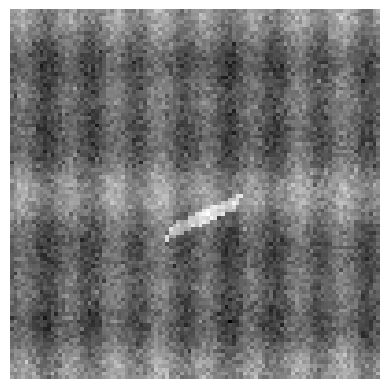

In [69]:
gen = ImageGenerator()
img = gen.generate_image()
gen.show_image(img)